In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the raw Sierra Leone data
df = pd.read_csv("../data/sierraleone-bumbuna.csv")

# Preview the first few rows
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
# Describe numeric columns
df.describe()

# Count missing values
df.isna().sum()

# Percentage of missing values
(df.isna().mean() * 100).sort_values(ascending=False)


Comments         100.0
GHI                0.0
Timestamp          0.0
DNI                0.0
DHI                0.0
ModB               0.0
ModA               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
Tamb               0.0
WSstdev            0.0
WD                 0.0
BP                 0.0
WDstdev            0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
dtype: float64

In [4]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


In [5]:
df_zscore = df[cols_to_check].dropna()
z_scores = np.abs(stats.zscore(df_zscore))

# Count how many outliers per column (|Z| > 3)
(pd.DataFrame(z_scores, columns=cols_to_check) > 3).sum()


GHI       2477
DNI       7586
DHI       2986
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64

In [6]:
for col in cols_to_check:
    median_val = df[col].median()
    z = np.abs(stats.zscore(df[col].fillna(median_val)))
    df[col] = np.where(z > 3, median_val, df[col])
    df[col] = df[col].fillna(median_val)


In [7]:
df.to_csv("../data/sierraleone_clean.csv", index=False)


In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


c:\Users\cv\Documents\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


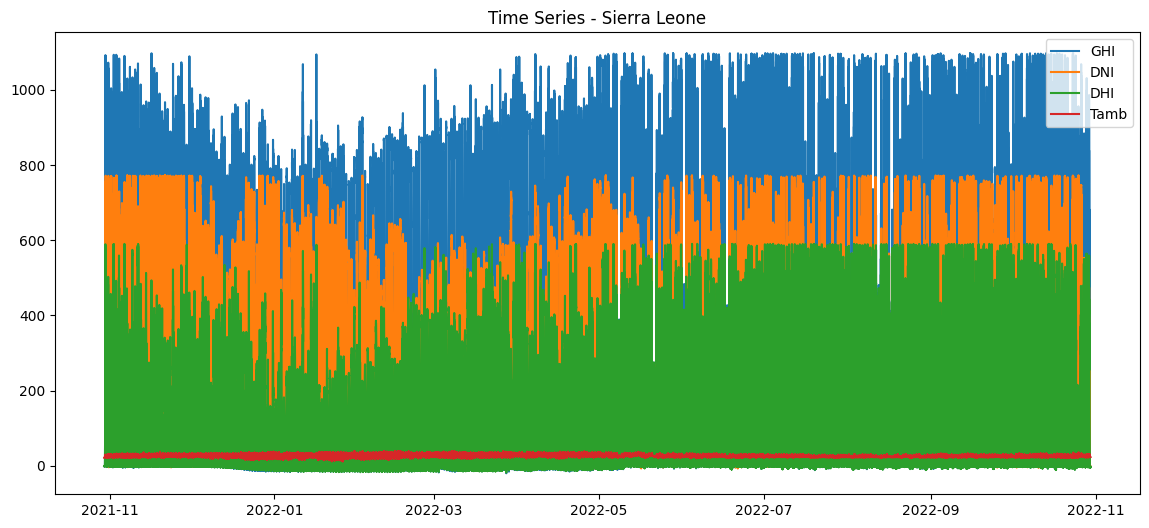

In [9]:
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.legend()
plt.title("Time Series - Sierra Leone")
plt.show()


Text(0.5, 1.0, 'Impact of Cleaning on ModA & ModB')

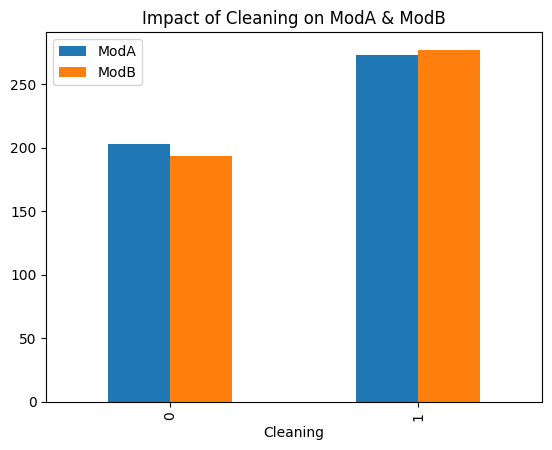

In [10]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Impact of Cleaning on ModA & ModB")


Text(0.5, 1.0, 'Correlation Heatmap')

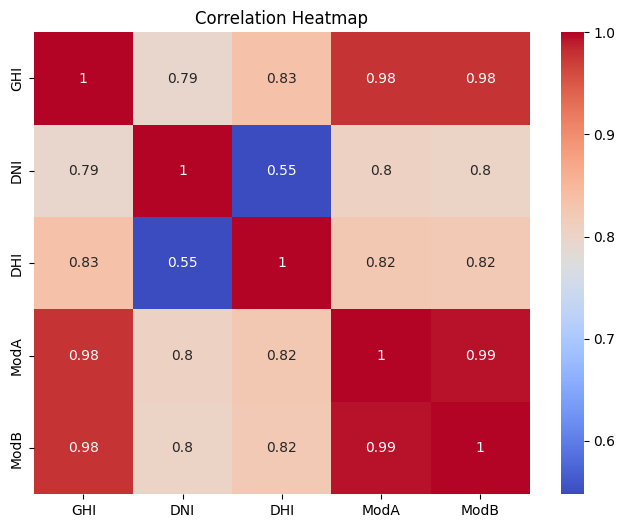

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


Text(0.5, 1.0, 'RH vs Tamb')

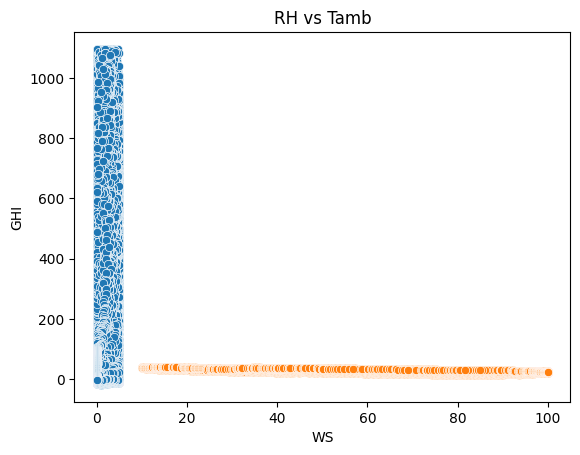

In [12]:
sns.scatterplot(data=df, x='WS', y='GHI')
plt.title("WS vs GHI")

sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title("RH vs Tamb")


Text(0.5, 1.0, 'Wind Speed Distribution')

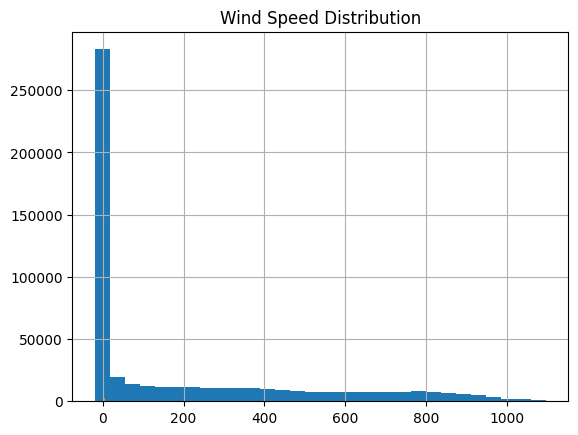

In [14]:
# Histograms
df['GHI'].hist(bins=30)
plt.title("GHI Distribution")

df['WS'].hist(bins=30)
plt.title("Wind Speed Distribution")


Text(0.5, 1.0, 'GHI vs Tamb (Bubble size = RH)')

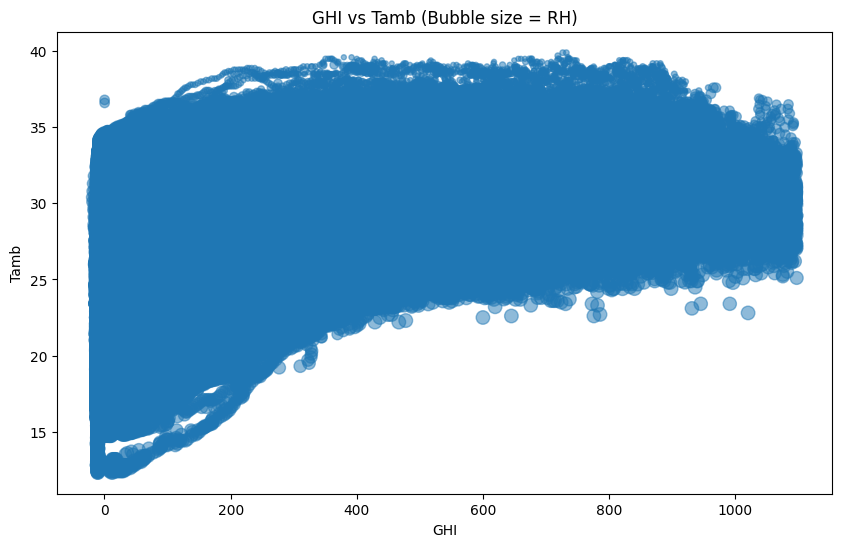

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Tamb (Bubble size = RH)")
